# Exploratory Data Analysis

## Exploring categorical data

### Contingency table review
In this chapter you'll continue working with the comics dataset introduced in the video. This is a collection of characteristics on all of the superheroes created by Marvel and DC comics in the last 80 years.

Let's start by creating a contingency table, which is a useful way to represent the total counts of observations that fall into each combination of the levels of categorical variables.

In [1]:
# read in comics dataset
comics <- read.csv("comics.csv",header=TRUE, sep=',')
comics

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel
Reed Richards (Earth-616),Public,Good,Brown Eyes,Brown Hair,Male,NA,Living Characters,2072,Nov-61,marvel
Hulk (Robert Bruce Banner),Public,Good,Brown Eyes,Brown Hair,Male,NA,Living Characters,2017,May-62,marvel
Scott Summers (Earth-616),Public,Neutral,Brown Eyes,Brown Hair,Male,NA,Living Characters,1955,Sep-63,marvel
Jonathan Storm (Earth-616),Public,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,1934,Nov-61,marvel


In [2]:
# View the levels() that the align variable can take.
levels(comics$align)

[1] "Bad"                "Good"               "Neutral"           
[4] "Reformed Criminals"

In [3]:
#View the levels() that the gender variable can take.
levels(comics$gender)

[1] "Female" "Male"   "Other"

In [4]:
# Create a contingency table of the same two variables.
tab = table(comics$align, comics$gender)
tab

                    
                     Female Male Other
  Bad                  1573 7561    32
  Good                 2490 4809    17
  Neutral               836 1799    17
  Reformed Criminals      1    2     0

### Dropping levels
The contingency table from the last exercise revealed that there are some levels that have very low counts. To simplify the analysis, it often helps to drop such levels.

In R, this requires two steps: first filtering out any rows with the levels that have very low counts, then removing these levels from the factor variable with droplevels(). This is because the droplevels() function would keep levels that have just 1 or 2 counts; it only drops levels that don't exist in a dataset.

In [5]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
# Use filter() to filter out all rows of comics with that level, then drop the unused level with droplevels()

comics_filtered <- comics %>%
    filter(align != 'Reformed Criminals') %>%
    droplevels()

head(comics_filtered)

name,id,align,eye,hair,gender,gsm,alive,appearances,first_appear,publisher
Spider-Man (Peter Parker),Secret,Good,Hazel Eyes,Brown Hair,Male,NA,Living Characters,4043,Aug-62,marvel
Captain America (Steven Rogers),Public,Good,Blue Eyes,White Hair,Male,NA,Living Characters,3360,Mar-41,marvel
"Wolverine (James \""Logan\"" Howlett)",Public,Neutral,Blue Eyes,Black Hair,Male,NA,Living Characters,3061,Oct-74,marvel
"Iron Man (Anthony \""Tony\"" Stark)",Public,Good,Blue Eyes,Black Hair,Male,NA,Living Characters,2961,Mar-63,marvel
Thor (Thor Odinson),No Dual,Good,Blue Eyes,Blond Hair,Male,NA,Living Characters,2258,Nov-50,marvel
Benjamin Grimm (Earth-616),Public,Good,Blue Eyes,No Hair,Male,NA,Living Characters,2255,Nov-61,marvel


### Side-by-side barcharts
While a contingency table represents the counts numerically, it's often more useful to represent them graphically.

Here you'll construct two side-by-side barcharts of the comics data. This shows that there can often be two or more options for presenting the same data. Passing the argument position = "dodge" to geom_bar() says that you want a side-by-side (i.e. not stacked) barchart.

In [10]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


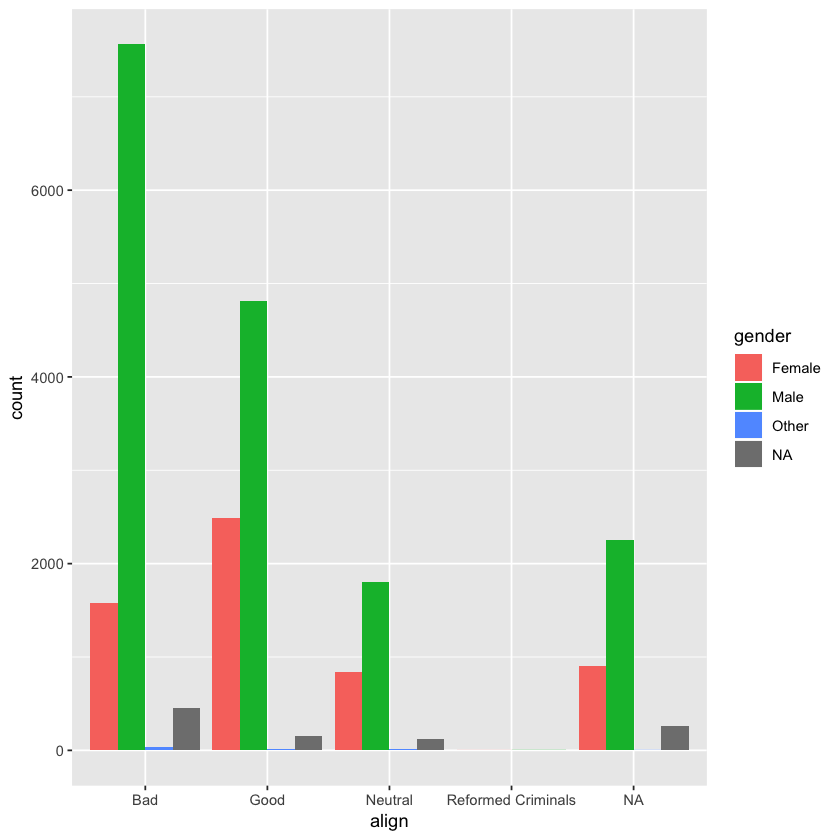

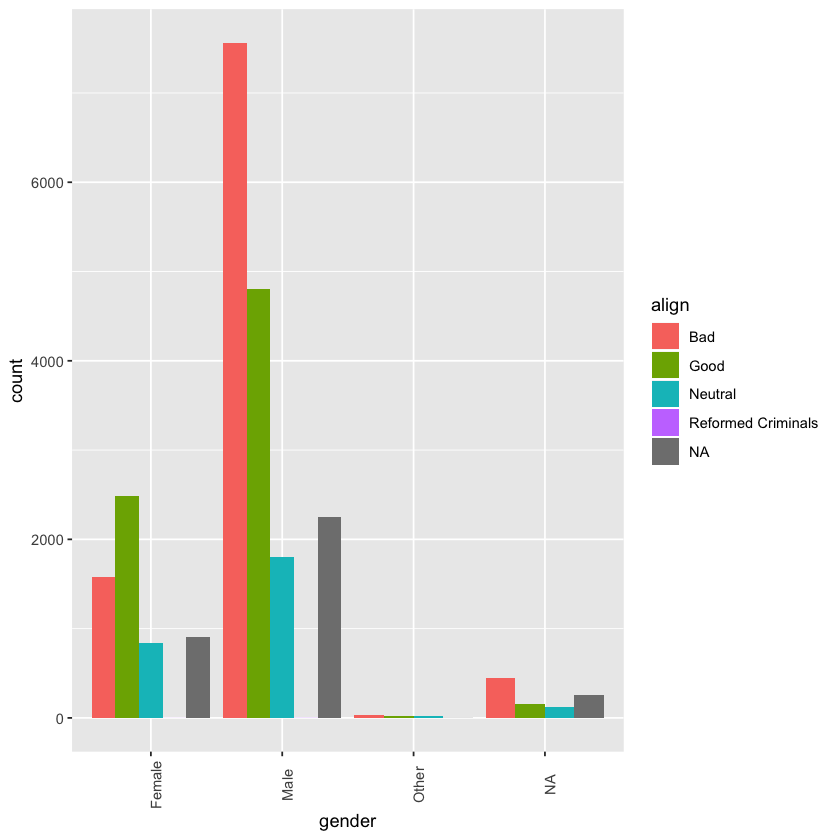

In [11]:
# Create a side-by-side barchart with align on the x-axis and gender as the fill aesthetic.
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "dodge")

# Create another side-by-side barchart with gender on the x-axis and align as the fill aesthetic. Rotate the axis labels 90 degrees to help readability.
ggplot(comics, aes(x =gender, fill = align)) + 
  geom_bar(position= "dodge") +
  theme(axis.text.x = element_text(angle = 90))

### Counts vs. proportions
Bar charts can tell dramatically different stories depending on whether they represent counts or proportions and, if proportions, what the proportions are conditioned on. To demonstrate this difference, you'll construct two barcharts in this exercise: one of counts and one of proportions.

By adding position = "fill" to geom_bar(), you are saying you want the bars to fill the entire height of the plotting window, thus displaying proportions and not raw counts.

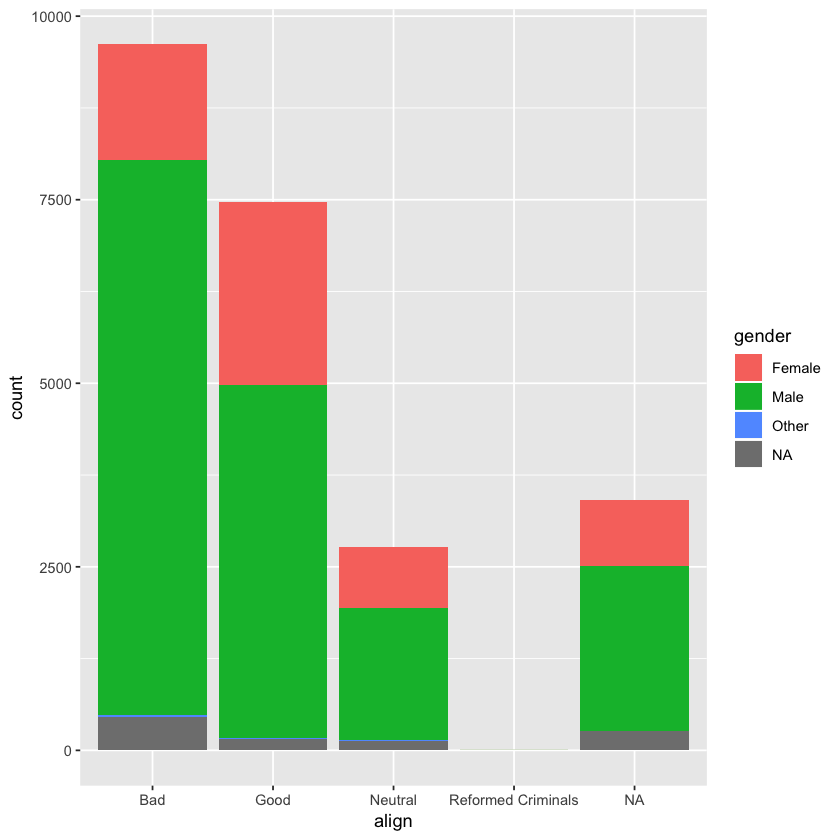

In [12]:
# Plot of gender by align
ggplot(comics, aes(x = align, fill = gender)) +
  geom_bar()

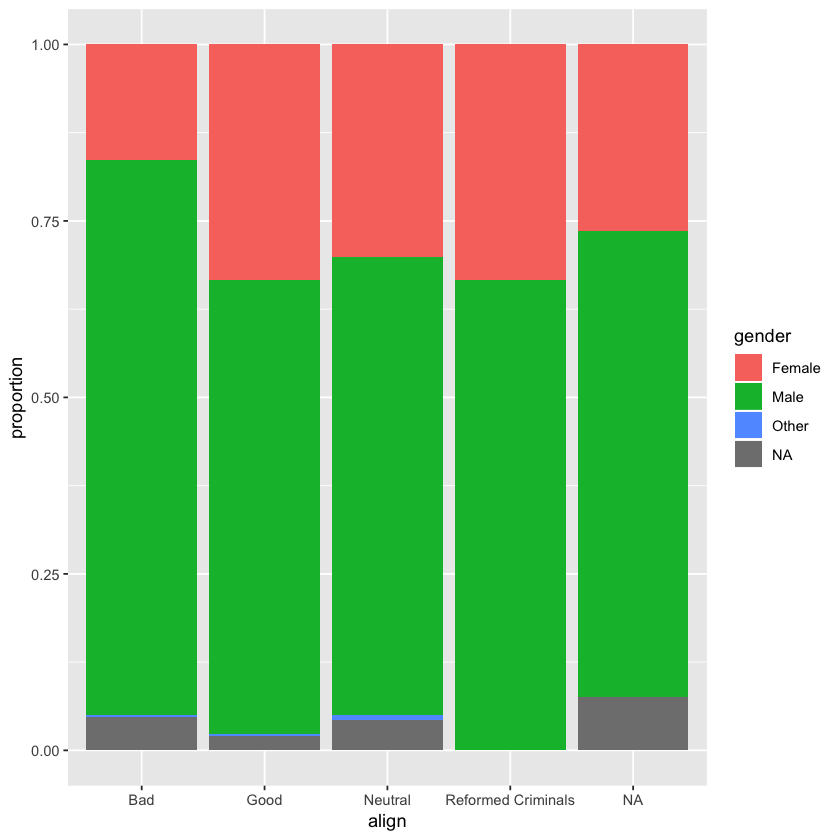

In [13]:
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")

### Marginal barchart
If you are interested in the distribution of alignment of all superheroes, it makes sense to construct a barchart for just that single variable.

You can improve the interpretability of the plot, though, by implementing some sensible ordering. Superheroes that are "Neutral" show an alignment between "Good" and "Bad", so it makes sense to put that bar in the middle.

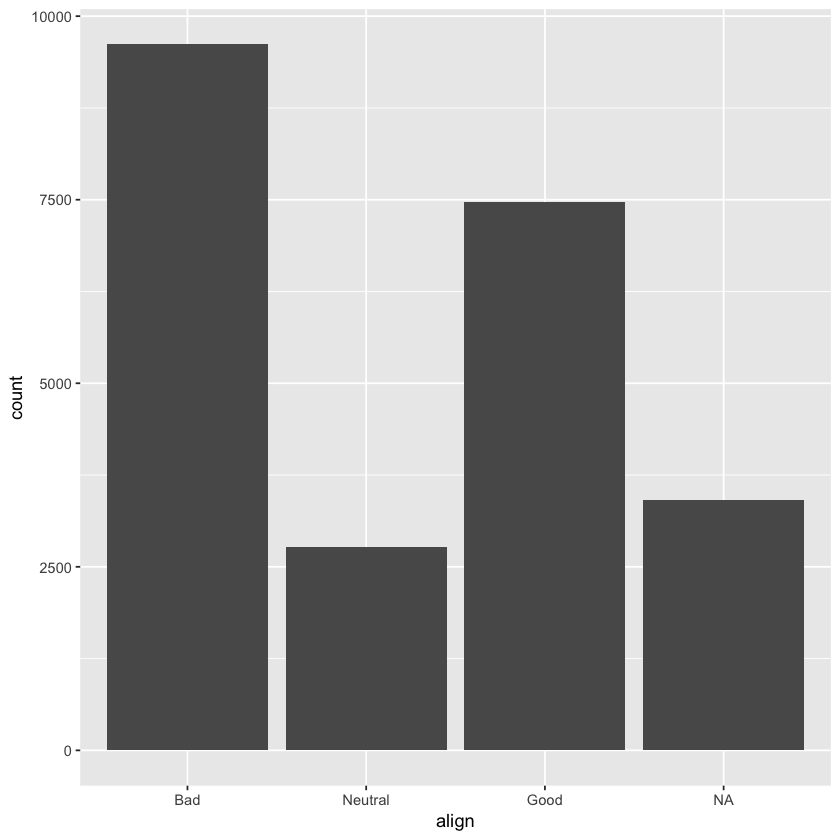

In [14]:
# Change the order of the levels in align
comics$align <- factor(comics$align, 
                       levels = c("Bad", "Neutral", "Good"))

# Create plot of align
ggplot(comics, aes(x = align)) + 
  geom_bar()

In [ ]:
# Create a barchart of align faceted by gender.
# Plot of alignment broken down by gender
ggplot(comics, aes(x = align)) + 
  geom_bar() +
  facet_wrap(~ gender)

In [ ]:
# Create barchart of flavor
ggplot(comics, aes(x = align)) + 
  geom_bar(fill = "chartreuse") + 
  theme(axis.text.x = element_text(angle = 90))

## Exploring Numerical Data

### Faceted histogram
In this chapter, you'll be working with the cars dataset, which records characteristics on all of the new models of cars for sale in the US in a certain year. You will investigate the distribution of mileage across a categorial variable, but before you get there, you'll want to familiarize yourself with the dataset.

In [ ]:
cars <- read.csv("cars04.csv",header=TRUE, sep=",")

#learn structure of dataframe
str(cars)

In [ ]:
#create a faceted histogram

ggplot(cars) +
    aes(x=city_mpg) +
    geom_histogram() +
    facet_wrap(~suv)

### Boxplots and density plots
The mileage of a car tends to be associated with the size of its engine (as measured by the number of cylinders). To explore the relationship between these two variables, you could stick to using histograms, but in this exercise you'll try your hand at two alternatives: the box plot and the density plot.

In [ ]:
# Filter cars with 4, 6, 8 cylinders
common_cyl <- filter(cars, ncyl %in% c(4, 6, 8))

In [ ]:
# Create box plots of city mpg by ncyl
ggplot(common_cyl) +
    aes(x = as.factor(ncyl), y = city_mpg) +
    geom_boxplot()

In [ ]:
# Create overlaid density plots for same data
ggplot(common_cyl) +
    aes(x = city_mpg, fill = as.factor(ncyl)) +
    geom_density(alpha = .3)

The variability in mileage of 8 cylinder cars seem much smaller than that of 4 cylinder cars.

### Marginal and conditional histograms
Now, turn your attention to a new variable: horsepwr. The goal is to get a sense of the marginal distribution of this variable and then compare it to the distribution of horsepower conditional on the price of the car being less than $25,000.

You'll be making two plots using the "data pipeline" paradigm, where you start with the raw data and end with the plot.

In [ ]:
# Create hist of horsepwr
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram() +
  ggtitle("Horse Power")

In [ ]:
# Create hist of horsepwr for affordable cars
cars %>% 
  filter(msrp < 25000) %>%
  ggplot(aes(x=horsepwr)) +
  geom_histogram() +
  xlim(c(90, 550)) +
  ggtitle("Horse Power of Affordable Cars")

The highest horsepower car in the less expensive range has just under 250 horsepower.

## Three binwidths
Before you take these plots for granted, it's a good idea to see how things change when you alter the binwidth. The binwidth determines how smooth your distribution will appear: the smaller the binwidth, the more jagged your distribution becomes. It's good practice to consider several binwidths in order to detect different types of structure in your data.

In [ ]:
# Create hist of horsepwr with binwidth of 3
cars %>%
  ggplot(aes(x=horsepwr)) +
  geom_histogram(binwidth = 3) +
  ggtitle("Horspower distribution with bin size 3")

In [ ]:
# Create hist of horsepwr with binwidth of 30
cars %>%
  ggplot(aes(x=horsepwr)) +
  geom_histogram(binwidth=30) +
  ggtitle("Horspower distribution with bin size 30")

In [ ]:
# Create hist of horsepwr with binwidth of 60
cars %>%
  ggplot(aes(x=horsepwr))+
  geom_histogram(binwidth = 60) +
  ggtitle("Horspower distribution with bin size 60")

### Box plots for outliers
In addition to indicating the center and spread of a distribution, a box plot provides a graphical means to detect outliers. You can apply this method to the msrp column (manufacturer's suggested retail price) to detect if there are unusually expensive or cheap cars.

In [ ]:
# Construct box plot of msrp
cars %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot()

In [ ]:
# Exclude the largest 3-5 outliers by filtering the rows to retain cars less than $100,000.
# Exclude outliers from data
cars_no_out <- cars %>%
  filter(msrp<100000)

# Construct box plot of msrp using the reduced dataset
cars_no_out %>%
  ggplot(aes(x=1,y=msrp)) +
  geom_boxplot()

## Plot selection
Consider two other columns in the cars dataset: city_mpg and width. Which is the most appropriate plot for displaying the important features of their distributions? Remember, both density plots and box plots display the central tendency and spread of the data, but the box plot is more robust to outliers.

In [ ]:
# Create plot of city_mpg
cars %>%
  ggplot(aes(x=1, y = city_mpg)) +
  geom_boxplot()

In [ ]:
# Create plot of width
cars %>%
  ggplot(aes(x=width)) +
  geom_density()

Because the city_mpg variable has a much wider range with its outliers, it's best to display its distribution as a box plot.

## 3 Variable plots
Faceting is a valuable technique for looking at several conditional distributions at the same time. If the faceted distributions are laid out in a grid, you can consider the association between a variable and two others, one on the rows of the grid and the other on the columns.

In [ ]:
# Facet hists using hwy mileage and ncyl
common_cyl %>%
  ggplot(aes(x = hwy_mpg)) +
  geom_histogram() +
  facet_grid(ncyl ~ suv) +
  ggtitle("Histogram comparison between nycl and suv")

Across both SUVs and non-SUVs, mileage tends to decrease as the number of cylinders increases.

## Measures of center

### Calculate center measures
Throughout this chapter, you will use data from gapminder, which tracks demographic data in countries of the world over time. To learn more about it, you can bring up the help file with ?gapminder.

For this exercise, focus on how the life expectancy differs from continent to continent. This requires that you conduct your analysis not at the country level, but aggregated up to the continent level. This is made possible by the one-two punch of group_by() and summarize(), a very powerful syntax for carrying out the same analysis on different subsets of the full dataset.

In [1]:
install.packages("gapminder")

Installing package into 'C:/Users/jason/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gapminder' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jason\AppData\Local\Temp\RtmpiwJkc4\downloaded_packages


In [16]:
library(gapminder)
library(dplyr)
library(ggplot2)
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [17]:
# Create dataset of 2007 data
gap2007 <- filter(gapminder, year == 2007)

continent,mean(lifeExp),median(lifeExp)
Africa,54.80604,52.9265
Americas,73.60812,72.8990
Asia,70.72848,72.3960
Europe,77.64860,78.6085
Oceania,80.71950,80.7195


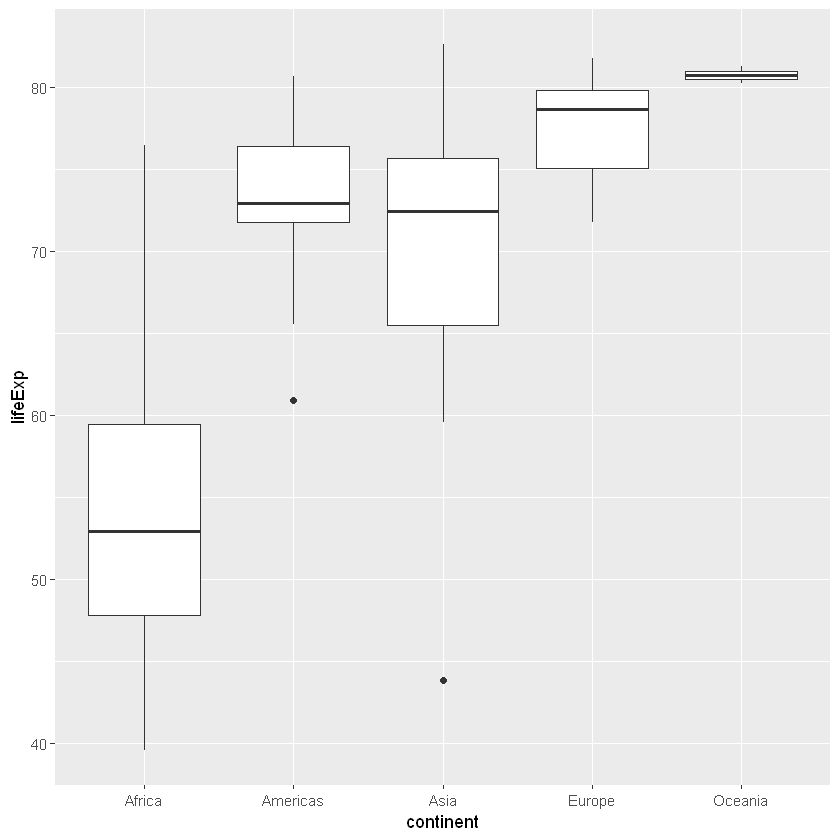

In [18]:
# Compute groupwise mean and median lifeExp
gap2007 %>%
  group_by(continent) %>%
  summarize(mean(lifeExp),
            median(lifeExp))

# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

### Calculate spread measures
Let's extend the powerful group_by() and summarize() syntax to measures of spread. If you're unsure whether you're working with symmetric or skewed distributions, it's a good idea to consider a robust measure like IQR in addition to the usual measures of variance or standard deviation.

In [19]:
# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.6307807,11.61025,52
Americas,4.4409476,4.63200,25
Asia,7.9637245,10.15200,33
Europe,2.9798127,4.78250,30
Oceania,0.7290271,0.51550,2


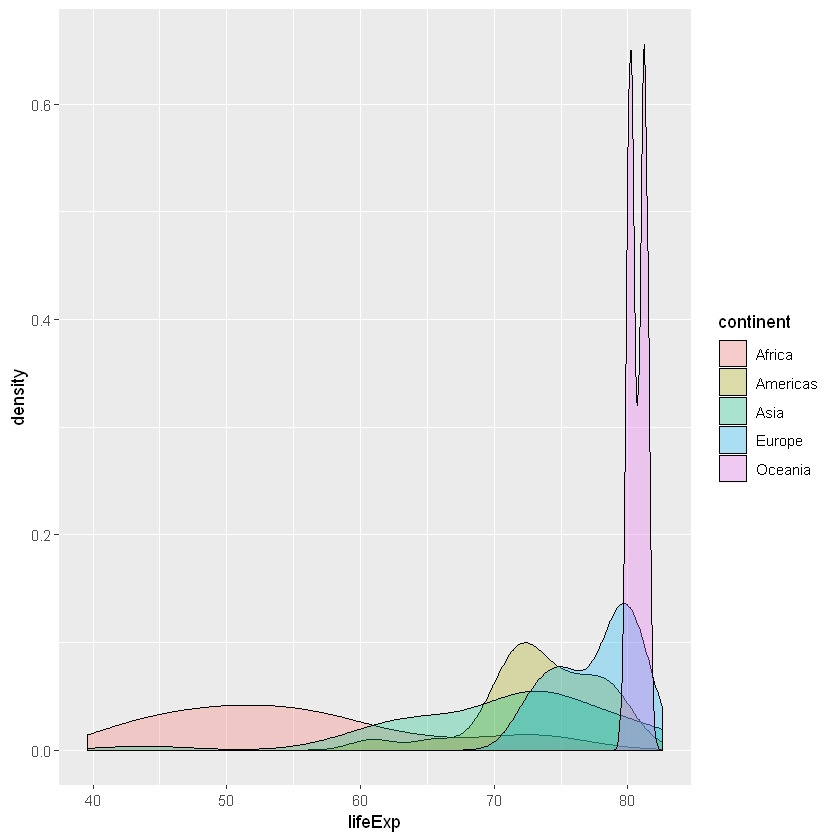

In [20]:
# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

In [21]:
# Compute stats for lifeExp in Americas
gap2007 %>%
  filter(continent=='Americas') %>%
  summarize(mean(lifeExp),
            sd(lifeExp))

mean(lifeExp),sd(lifeExp)
73.60812,4.440948


In [22]:
# Compute stats for population
gap2007 %>%
  summarize(median(pop),
          IQR(pop))

median(pop),IQR(pop)
10517531,26702008


Like mean and standard deviation, median and IQR measure the central tendency and spread, respectively, but are robust to outliers and non-normal data.

### Transformations
Highly skewed distributions can make it very difficult to learn anything from a visualization. Transformations can be helpful in revealing the more subtle structure.

Here you'll focus on the population variable, which exhibits strong right skew, and transform it with the natural logarithm function (log() in R).

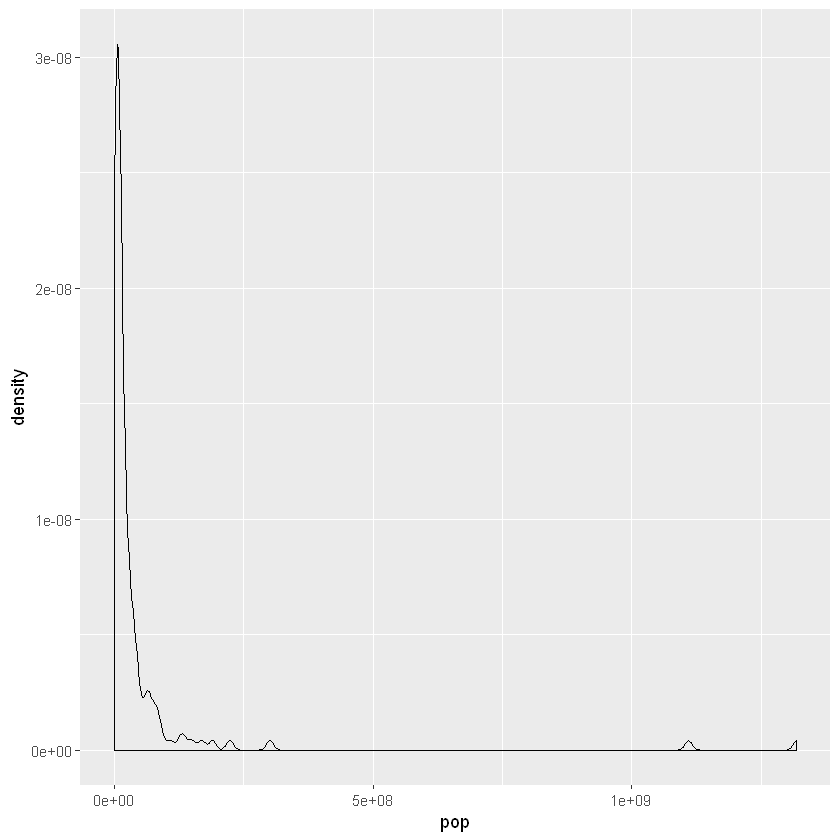

In [23]:
# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()

#### Transfor into now log_pop for pop

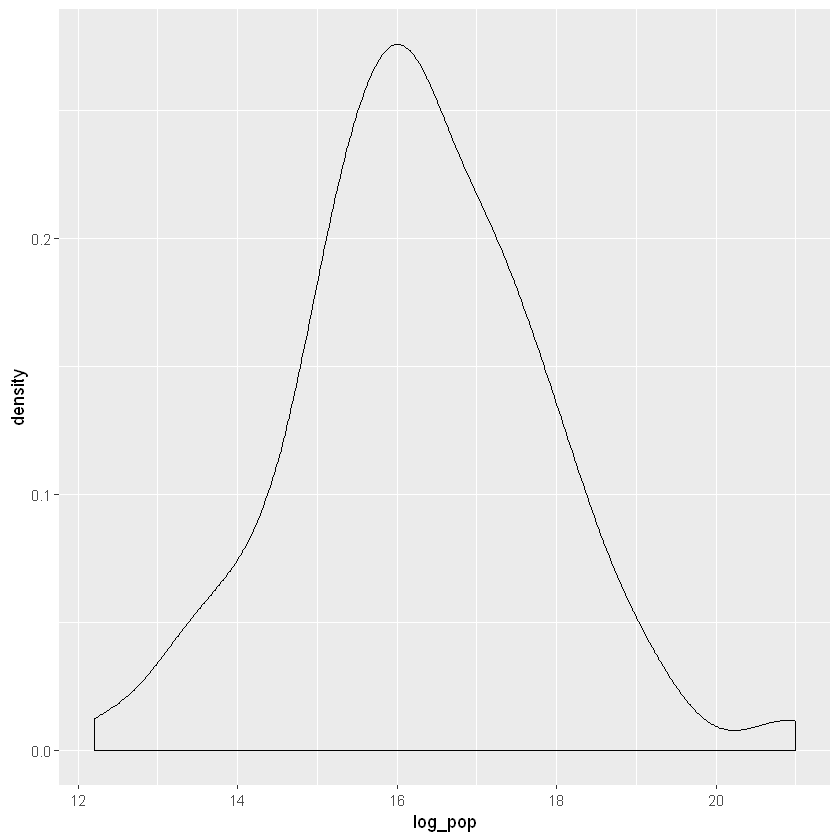

In [24]:
# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop=log(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x = log_pop)) +
  geom_density()

### Identify outliers
Consider the distribution, shown here, of the life expectancies of the countries in Asia. The box plot identifies one clear outlier: a country with a notably low life expectancy. Do you have a guess as to which country this might be? Test your guess in the console using either min() or filter(), then proceed to building a plot with that country removed.

In [25]:
# Filter for Asia, add column indicating outliers
gap_asia <- gap2007 %>%
  filter(continent=='Asia') %>%
  mutate(is_outlier= lifeExp<50)

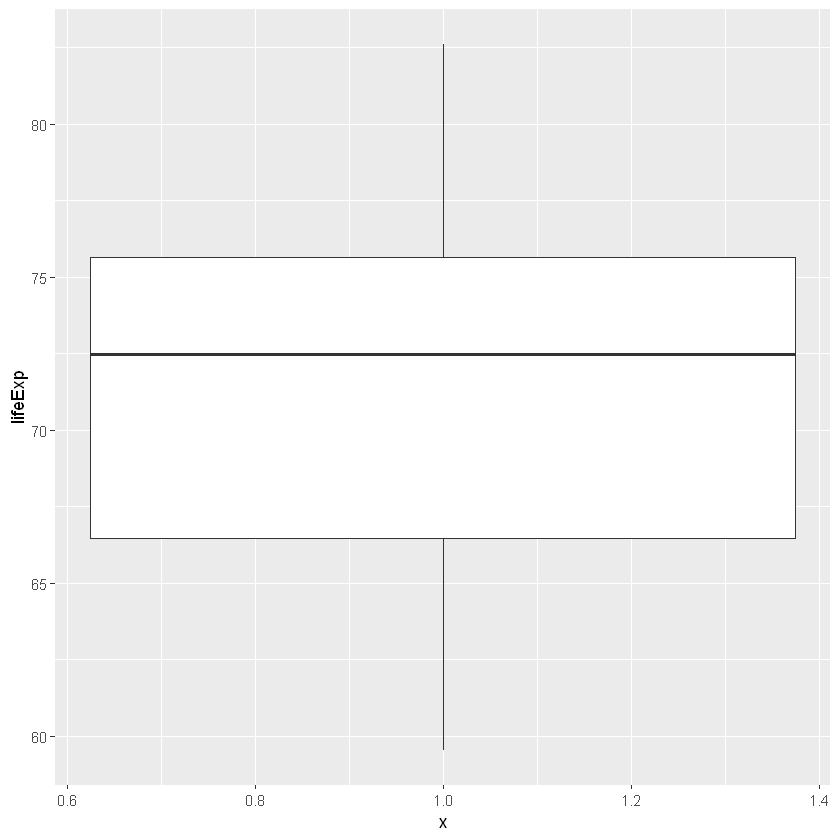

In [26]:
# Remove outliers, create box plot of lifeExp
gap_asia %>%
  filter(!is_outlier) %>%
  ggplot(aes(x = 1 , y = lifeExp)) +
  geom_boxplot()